In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# import dlib

In [2]:
frame = cv2.imread("../Sample_Pic_OD/HJ.jpg")

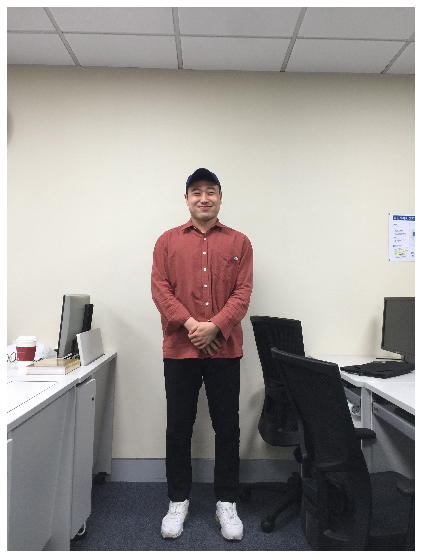

In [3]:
plt.figure(figsize=(14,10))
plt.axis('off')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [4]:
face_cascade = cv2.CascadeClassifier('../harrs/haarcascade_frontalface_default.xml')

def detect(gray, frame):
  """ Input = greyscale image or frame from video stream
      Output = Image with rectangle box in the face
  """
  # Now get the tuples that detect the faces using above cascade
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  # faces are the tuples of 4 numbers
  # x,y => upperleft corner coordinates of face
  # width(w) of rectangle in the face
  # height(h) of rectangle in the face
  # grey means the input image to the detector
  # 1.3 is the kernel size or size of image reduced when applying the detection
  # 5 is the number of neighbors after which we accept that is a face
  
  # Now iterate over the faces and detect eyes
  for (x,y,w,h) in faces:
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
    # Arguements => image, top-left coordinates, bottomright coordinates, color, rectangle border thickness
    
    # we now need two region of interests(ROI) grey and color for eyes one to detect and another to draw rectangle
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
      
  return frame, faces

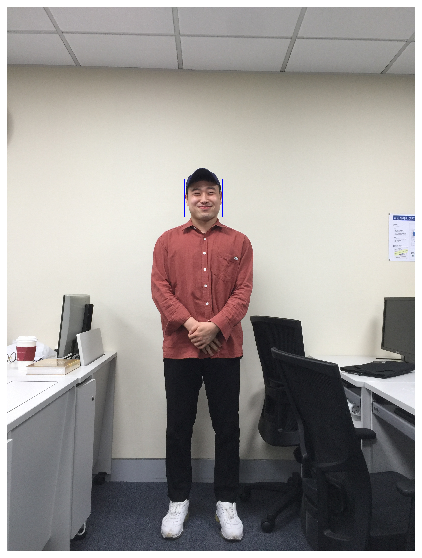

In [5]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
canvas, loc = detect(gray, frame)

plt.figure(figsize=(16,10))
plt.axis('off')
plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))

In [6]:
loc

array([[1065, 1033,  227,  227]], dtype=int32)

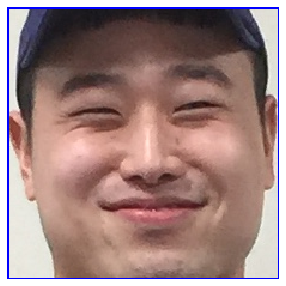

In [7]:
plt.figure(figsize=(8,5))
plt.axis('off')
plt.imshow(cv2.cvtColor(canvas[loc[0,1]:loc[0,1]+loc[0,3],\
                               loc[0,0]:loc[0,0]+loc[0,2]], cv2.COLOR_BGR2RGB))

### HOG estimator

In [18]:
faceRects[0].left()

1069

In [7]:
hogFaceDetector = dlib.get_frontal_face_detector()
faceRects = hogFaceDetector(frame, 0)
facelist = []
for faceRect in faceRects:
    x1 = faceRect.left()
    y1 = faceRect.top()
    x2 = faceRect.right()
    y2 = faceRect.bottom()
    facelist.append(x1)
    facelist.append(x2)
    facelist.append(y1)
    facelist.append(y2)
    print(x1,x2,y1,y2)

1069 1284 1069 1284


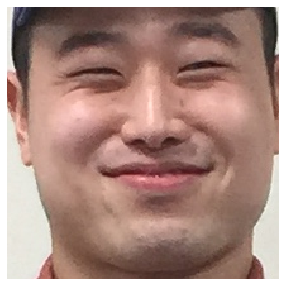

In [9]:
plt.figure(figsize=(8,5))
plt.axis('off')
plt.imshow(cv2.cvtColor(frame[facelist[0]:facelist[1],\
                               facelist[2]:facelist[3]], cv2.COLOR_BGR2RGB))

### face detection by DNN

In [ ]:
# optional

# Training for Facial Emotion

In [8]:
import numpy as np

In [9]:
np.arange(3)

array([0, 1, 2])

In [10]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from keras.regularizers import l1

Using TensorFlow backend.
/home/KTH/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/KTH/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/KTH/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/KTH/.local/lib/python3.6/site-packages/tensorflow/python/framework/d

In [11]:
import keras.backend as K
K.clear_session()

# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001),input_shape=(48,48,1)))
# model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(7, kernel_size=(1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# # model.add(BatchNormalization())

model.add(Conv2D(7, kernel_size=(4, 4), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())

model.add(Flatten())

model.add(Activation("softmax"))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         147584    
________________________________________________

In [12]:
model.load_weights('../emotion_detector_models/model_v6_71+83.hdf5')

In [13]:
HJ_face = cv2.cvtColor(canvas[loc[0,1]:loc[0,1]+loc[0,3],loc[0,0]:loc[0,0]+loc[0,2]], cv2.COLOR_BGR2GRAY)

In [14]:
HJ_face.shape

(227, 227)

In [15]:
HJ_face = cv2.resize(HJ_face, dsize=(48,48), interpolation=cv2.INTER_LINEAR)

In [16]:
HJ_face.shape

(48, 48)

In [17]:
HJ_face = HJ_face.reshape(1,48,48,-1)

In [19]:
label_dict = {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprise': 6}

In [20]:
label_dict = {num:emotion for emotion, num in label_dict.items()}

In [21]:
HJ_feeling = model.predict(HJ_face)

In [22]:
label_dict[np.argmax(HJ_feeling)]

'Happy'